In [32]:
# importing libraries and methods
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [33]:
# reg = pd.read_excel('/content/wine updated.xlsx')

# Importing CSV File From Gdrive

url ='https://drive.google.com/file/d/1276_ETIPxOS2qT2ZnVk27yyk3TZ21otl/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
reg = pd.read_csv(url)

reg.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Class 6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Class 6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Class 6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Class 6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Class 6


In [34]:
reg.columns

Index(['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [35]:
reg.isnull().sum()

fixedacidity          0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
dtype: int64

In [36]:
reg.dtypes

fixedacidity          float64
volatileacidity       float64
citricacid            float64
residualsugar         float64
chlorides             float64
freesulfurdioxide     float64
totalsulfurdioxide    float64
density               float64
pH                    float64
sulphates             float64
alcohol               float64
quality                object
dtype: object

In [37]:
reg.shape

(4898, 12)

In [38]:
reg['quality'].value_counts()

Class 6    2198
Class 5    1457
Class 7     880
Class 8     175
Class 4     163
Class 3      20
Class 9       5
Name: quality, dtype: int64

In [39]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
reg['qualityCode']= label_encoder.fit_transform(reg['quality'])

In [40]:
reg['qualityCode'].value_counts()

3    2198
2    1457
4     880
5     175
1     163
0      20
6       5
Name: qualityCode, dtype: int64

In [41]:
reg.columns

Index(['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality', 'qualityCode'],
      dtype='object')

In [42]:
from sklearn import linear_model
lrm = linear_model.LinearRegression()

In [43]:
x =  reg[['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'qualityCode']]
y = np.asanyarray(reg['alcohol'])


In [44]:
import statsmodels.api as sm

In [45]:
# append constant in summary
x2 = sm.add_constant(x)
# ordinar least sq
# preparing estimate summary
est = sm.OLS(y, x2)
est2 = est.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [46]:
# checking significance
if est2.pvalues[0] < 0.05:
  print('Model is significant')
else:
  print('Model is not significant')

Model is significant


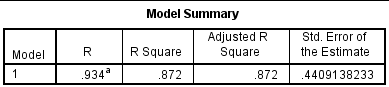

In [47]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     3024.
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:12:26   Log-Likelihood:                -2933.0
No. Observations:                4898   AIC:                             5890.
Df Residuals:                    4886   BIC:                             5968.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                672.1458      5

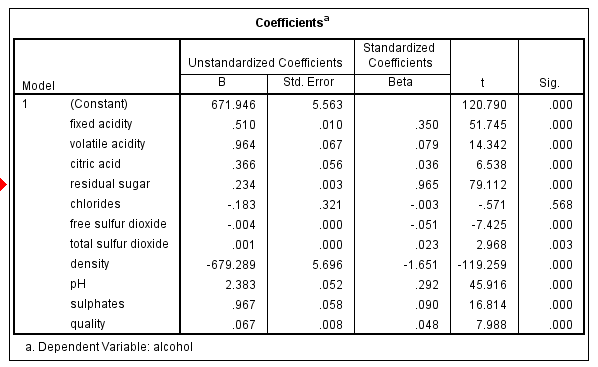

In [48]:
# Droping insignificant variable
x = x.drop(['chlorides'], axis = 1)

In [49]:
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary(alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     3327.
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:12:26   Log-Likelihood:                -2933.1
No. Observations:                4898   AIC:                             5888.
Df Residuals:                    4887   BIC:                             5960.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                673.1902      5

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [50]:
# x2 = sm.add_constant(x)
# est = sm.OLS(y, x2)
# est2 = est.fit()
# print(est2.summary(alpha=0.1))

Preparing model for prediction

In [51]:
lrm.fit(x,y)

LinearRegression()

In [52]:
y_hat = lrm.predict(x)

In [53]:
y_hat

array([ 8.70837073,  9.49732917, 10.6894921 , ...,  9.54477133,
       12.57901464, 11.89540471])

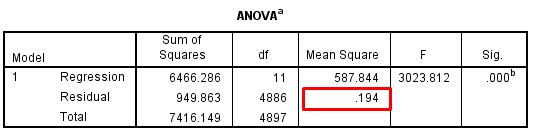

In [54]:
# Residual Mean Square
est2.mse_resid
# est2.mse_total,est2.mse_model # other Errors

0.1943782009708604

In [55]:
x.columns

Index(['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH', 'sulphates',
       'qualityCode'],
      dtype='object')

In [56]:
# set sequence for formula
constant = lrm.intercept_ # beta node
# beta 1 to 10
fixedacidity = lrm.coef_[0] 
volatileacidity = lrm.coef_[1]
citricacid = lrm.coef_[2]
residualsugar = lrm.coef_[3]
freesulfurdioxide = lrm.coef_[4]
totalsulfurdioxide = lrm.coef_[5]
density = lrm.coef_[6]
pH = lrm.coef_[7]
sulphates = lrm.coef_[8]
qualityCode = lrm.coef_[9]

In [57]:
pred = reg[['alcohol', 'fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'qualityCode']]

In [58]:
pred.describe()

,alcohol,fixedacidity,volatileacidity,citricacid,residualsugar,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,qualityCode
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,10.514267,6.854788,0.278241,0.334192,6.391415,35.308085,138.360657,0.994027,3.188267,0.489847,2.877909
std,1.230621,0.843868,0.100795,0.121020,5.072058,17.007137,42.498065,0.002991,0.151001,0.114126,0.885639
min,8.000000,3.800000,0.080000,0.000000,0.600000,2.000000,9.000000,0.987110,2.720000,0.220000,0.000000
25%,9.500000,6.300000,0.210000,0.270000,1.700000,23.000000,108.000000,0.991723,3.090000,0.410000,2.000000
50%,10.400000,6.800000,0.260000,0.320000,5.200000,34.000000,134.000000,0.993740,3.180000,0.470000,3.000000
75%,11.400000,7.300000,0.320000,0.390000,9.900000,46.000000,167.000000,0.996100,3.280000,0.550000,3.000000
max,14.200000,14.200000,1.100000,1.660000,65.800000,289.000000,440.000000,1.038980,3.820000,1.080000,6.000000


In [59]:
minpred = constant + (fixedacidity * 3.8) + (volatileacidity * 0.08) + (citricacid * 0) + (residualsugar * 0.6) + (freesulfurdioxide * 2) + (totalsulfurdioxide * 9) + (density * 0.98711) + (pH * 2.72) + (sulphates * 0.22) + (qualityCode * 0)
minpred

10.454188869644344

In [60]:
pred.iloc[2859]

alcohol                10.50000
fixedacidity            6.60000
volatileacidity         0.21000
citricacid              0.36000
residualsugar           0.80000
freesulfurdioxide      48.00000
totalsulfurdioxide    113.00000
density                 0.99165
pH                      3.24000
sulphates               0.68000
qualityCode             3.00000
Name: 2859, dtype: float64

In [61]:
# now check using ML method
y_ = lrm.predict([[6.6,0.21,0.36,0.8,48,113,0.99165,3.24,0.68,3]])
y_

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([10.88592508])

In [62]:
# prediction using formula
prediction = constant + (fixedacidity * 6.6) + (volatileacidity * 0.21) + (citricacid * 0.36) + (residualsugar * 0.8) + (freesulfurdioxide * 48) + (totalsulfurdioxide * 113) + (density * 0.99165) + (pH * 3.24) + (sulphates * 0.68) + (qualityCode * 3)
prediction

10.885925079731456